In [7]:
import torch
import torch.nn as nn
import torch.nn.init as init
import random
import copy
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
import DeepTreeEnsemble
import torch.nn.functional as F
from importlib import reload
reload(DeepTreeEnsemble)
from DeepTreeEnsemble import DeepTreeEnsemble, create_dataloaders_for_dataset 
# if this ^ doesn't work, try 'pip install -e .' in the root directory of it. Make sure you are in 
# the desired environment. 

In [8]:
train_dataloader, test_dataloader, input_size, output_size = create_dataloaders_for_dataset(dataset_name='cali_housing', task='regression', batch_size=32)

xtrain size 16512
xtest size 4128
y_train size 16512
y_test size 4128


In [9]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size, dropout=.5):
        super(MLP, self).__init__()
        self.layers = nn.ModuleList()
        self.batch_norms = nn.ModuleList()

        # Create the first hidden layer
        self.layers.append(nn.Linear(input_size, hidden_layers[0]))
        self.batch_norms.append(nn.BatchNorm1d(hidden_layers[0]))

        # Create additional hidden layers
        for i in range(1, len(hidden_layers)):
            self.layers.append(nn.Linear(hidden_layers[i-1], hidden_layers[i]))
            self.batch_norms.append(nn.BatchNorm1d(hidden_layers[i]))

        # Output layer
        self.output = nn.Linear(hidden_layers[-1], output_size)

        # Dropout layer
        self.dropout = nn.Dropout(dropout)


    def forward(self, x):
        i = 0
        for layer, batch_norm in zip(self.layers, self.batch_norms):
            # x = F.relu(batch_norm(layer(x)))
            i=i+1
            x = self.dropout(x)
            # print('Layer dtype: ', layer.weight.dtype)
            x = x.to(torch.float32) # <-- area of concern
            # print('tensor dytpe: ', x.dtype)
            # layer.weight = layer.weight.to(torch.float32)
            x = F.relu(batch_norm(layer(x)))
            
            # print(f'dtype is {x.dtype} after layer {i}')

        x = self.output(x)
        return x

# Changing the base
Testing base 4, 6, 8, 10 and 12 with 5 trails each

## Base 4

In [6]:
hidden_layers = [50, 100, 50]
multiLayerPerceptron = MLP(input_size=input_size, hidden_layers=hidden_layers, output_size=output_size+1, dropout=.5) #hidden size default at 100

# Fill DTE params
modelSaveDirectory = './saved_models/'
DTEmlp4b = DeepTreeEnsemble(task_name='regression',
                                model_arch=multiLayerPerceptron,
                                model_dir=modelSaveDirectory, 
                                base_number=4,
                                epochs=10,
                                train_dataloader=train_dataloader, 
                                test_dataloader=test_dataloader,
                                learning_rate=0.0001)

Randomly initializing 4 models
Training Model with id 1


in multi


Training Process:  10%|█         | 1/10 [00:00<00:00,  9.50it/s]

Epoch [1/10], Train F1:0.4953400127670883, Train Loss: 1.0580, Train Acc: 0.4893, Test F1:0.5032525133057363, Test Loss: 1.0509, Test Acc: 0.6120


Training Process:  30%|███       | 3/10 [00:00<00:00, 11.91it/s]

Epoch [2/10], Train F1:0.4990397071600079, Train Loss: 1.0570, Train Acc: 0.4897, Test F1:0.5048732943469786, Test Loss: 1.0396, Test Acc: 0.6198
Epoch [3/10], Train F1:0.512843791149062, Train Loss: 1.0527, Train Acc: 0.4946, Test F1:0.5083204334365325, Test Loss: 1.0331, Test Acc: 0.6276


Training Process:  30%|███       | 3/10 [00:00<00:00, 11.91it/s]

Epoch [4/10], Train F1:0.5123198220408531, Train Loss: 1.0484, Train Acc: 0.4980, Test F1:0.5193056577094345, Test Loss: 1.0296, Test Acc: 0.6335


Training Process:  50%|█████     | 5/10 [00:00<00:00, 12.78it/s]

Epoch [5/10], Train F1:0.5089803182346274, Train Loss: 1.0446, Train Acc: 0.4993, Test F1:0.5214908444421061, Test Loss: 1.0282, Test Acc: 0.6354
Epoch [6/10], Train F1:0.5155437591507323, Train Loss: 1.0412, Train Acc: 0.5075, Test F1:0.5200037042425462, Test Loss: 1.0228, Test Acc: 0.6367


Training Process:  70%|███████   | 7/10 [00:00<00:00, 13.26it/s]

Epoch [7/10], Train F1:0.521258849956084, Train Loss: 1.0376, Train Acc: 0.5158, Test F1:0.5274136055560203, Test Loss: 1.0179, Test Acc: 0.6430


Training Process:  90%|█████████ | 9/10 [00:00<00:00, 13.20it/s]

Epoch [8/10], Train F1:0.5227266359421652, Train Loss: 1.0356, Train Acc: 0.5169, Test F1:0.5446436538548957, Test Loss: 1.0143, Test Acc: 0.6533
Epoch [9/10], Train F1:0.5236966172794695, Train Loss: 1.0337, Train Acc: 0.5183, Test F1:0.5577284125368974, Test Loss: 1.0121, Test Acc: 0.6614


Training Process: 100%|██████████| 10/10 [00:00<00:00, 12.83it/s]


Epoch [10/10], Train F1:0.5290932807865297, Train Loss: 1.0325, Train Acc: 0.5221, Test F1:0.5680049008734961, Test Loss: 1.0087, Test Acc: 0.6678
Total Epochs: 10
Train loss start: 1.0585380792617798, Train loss end: 1.1400858163833618
Highest Mean Train Accuracy (over epoch): 0.5221428571428572
Test loss start: 1.0512818098068237, Test loss end: 0.9595645070075989
Highest mean Test Accuracy (over epoch): 0.667795138888889


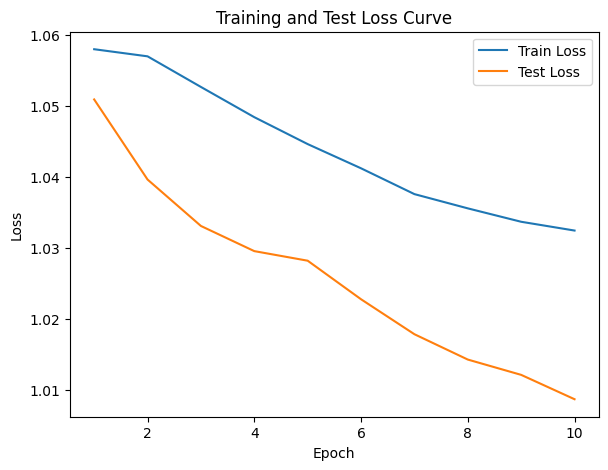

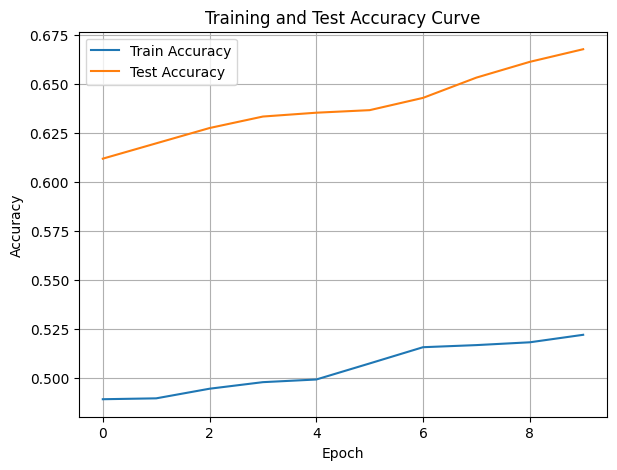

./saved_models/model_1.pth
Training Model with id 2
in multi


Training Process:  20%|██        | 2/10 [00:00<00:00, 14.94it/s]

Epoch [1/10], Train F1:0.5208176589673811, Train Loss: 0.9939, Train Acc: 0.5128, Test F1:0.5064338645596178, Test Loss: 1.0167, Test Acc: 0.5434
Epoch [2/10], Train F1:0.5646111809722781, Train Loss: 0.9825, Train Acc: 0.5536, Test F1:0.4943171325442794, Test Loss: 1.0136, Test Acc: 0.5356


Training Process:  20%|██        | 2/10 [00:00<00:00, 14.94it/s]

Epoch [3/10], Train F1:0.5543062602517359, Train Loss: 0.9787, Train Acc: 0.5523, Test F1:0.5120970546906521, Test Loss: 1.0098, Test Acc: 0.5501


Training Process:  40%|████      | 4/10 [00:00<00:00, 13.80it/s]

Epoch [4/10], Train F1:0.5559423627021877, Train Loss: 0.9760, Train Acc: 0.5516, Test F1:0.517566409597258, Test Loss: 1.0079, Test Acc: 0.5558
Epoch [5/10], Train F1:0.565237341405231, Train Loss: 0.9728, Train Acc: 0.5578, Test F1:0.5264759699909323, Test Loss: 1.0034, Test Acc: 0.5623


Training Process:  60%|██████    | 6/10 [00:00<00:00, 13.29it/s]

Epoch [6/10], Train F1:0.5712673751547432, Train Loss: 0.9701, Train Acc: 0.5632, Test F1:0.5426258456599015, Test Loss: 0.9987, Test Acc: 0.5742


Training Process:  80%|████████  | 8/10 [00:00<00:00, 13.36it/s]

Epoch [7/10], Train F1:0.5775757240196934, Train Loss: 0.9678, Train Acc: 0.5688, Test F1:0.576834763170755, Test Loss: 0.9936, Test Acc: 0.5972
Epoch [8/10], Train F1:0.5850296012389172, Train Loss: 0.9628, Train Acc: 0.5771, Test F1:0.6047736331390887, Test Loss: 0.9896, Test Acc: 0.6182


Training Process:  80%|████████  | 8/10 [00:00<00:00, 13.36it/s]

Epoch [9/10], Train F1:0.5952517100603186, Train Loss: 0.9586, Train Acc: 0.5875, Test F1:0.6132470905880297, Test Loss: 0.9869, Test Acc: 0.6244


Training Process: 100%|██████████| 10/10 [00:00<00:00, 13.30it/s]


Epoch [10/10], Train F1:0.5987149332682892, Train Loss: 0.9568, Train Acc: 0.5905, Test F1:0.614652849685305, Test Loss: 0.9848, Test Acc: 0.6255
Total Epochs: 10
Train loss start: 1.0210398435592651, Train loss end: 0.9636369943618774
Highest Mean Train Accuracy (over epoch): 0.5904761904761905
Test loss start: 1.0308077335357666, Test loss end: 0.9488686323165894
Highest mean Test Accuracy (over epoch): 0.6255208333333334


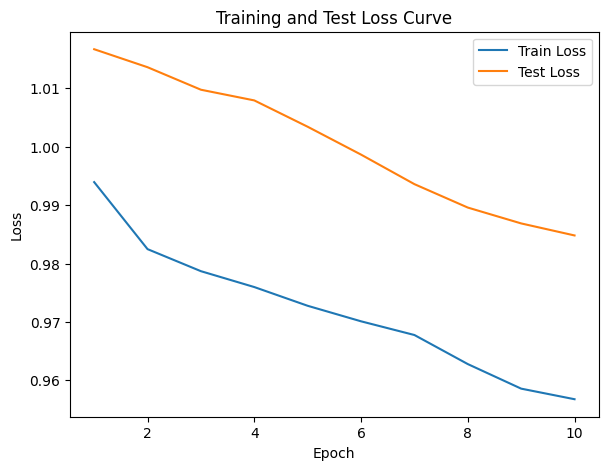

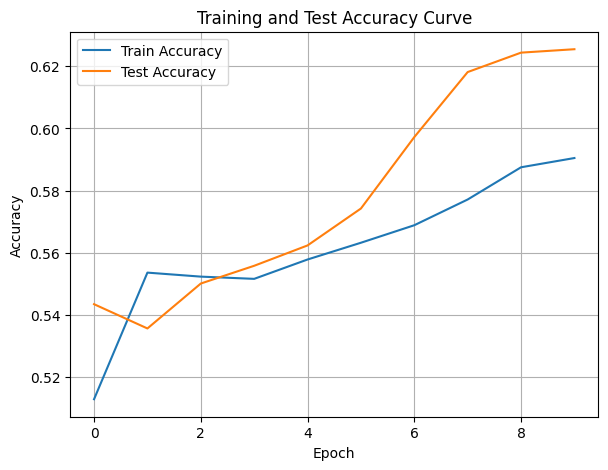

./saved_models/model_2.pth
Training Model with id 3
in multi


Training Process:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Train F1:0.6343295492882439, Train Loss: 0.9726, Train Acc: 0.6509, Test F1:0.6863826232247285, Test Loss: 1.0109, Test Acc: 0.7057


Training Process:  20%|██        | 2/10 [00:00<00:00, 10.90it/s]

Epoch [2/10], Train F1:0.6449984399995964, Train Loss: 0.9659, Train Acc: 0.6555, Test F1:0.6749410290431963, Test Loss: 0.9958, Test Acc: 0.7049
Epoch [3/10], Train F1:0.6529271454615799, Train Loss: 0.9654, Train Acc: 0.6605, Test F1:0.6707419436164375, Test Loss: 0.9935, Test Acc: 0.7046


Training Process:  40%|████      | 4/10 [00:00<00:00, 11.97it/s]

Epoch [4/10], Train F1:0.6529377633498452, Train Loss: 0.9646, Train Acc: 0.6586, Test F1:0.6653770239134367, Test Loss: 0.9898, Test Acc: 0.7025


Training Process:  60%|██████    | 6/10 [00:00<00:00, 11.60it/s]

Epoch [5/10], Train F1:0.6563663093156783, Train Loss: 0.9620, Train Acc: 0.6611, Test F1:0.6568991877246545, Test Loss: 0.9862, Test Acc: 0.6969
Epoch [6/10], Train F1:0.6595497535741969, Train Loss: 0.9592, Train Acc: 0.6641, Test F1:0.6605262274327446, Test Loss: 0.9835, Test Acc: 0.7007


Training Process:  60%|██████    | 6/10 [00:00<00:00, 11.60it/s]

Epoch [7/10], Train F1:0.6635812029744023, Train Loss: 0.9563, Train Acc: 0.6686, Test F1:0.657516410072801, Test Loss: 0.9808, Test Acc: 0.7000


Training Process:  80%|████████  | 8/10 [00:00<00:00, 10.98it/s]

Epoch [8/10], Train F1:0.6669401349460905, Train Loss: 0.9529, Train Acc: 0.6718, Test F1:0.6560961971763685, Test Loss: 0.9776, Test Acc: 0.6998


Training Process:  80%|████████  | 8/10 [00:00<00:00, 10.98it/s]

Epoch [9/10], Train F1:0.6695564782435001, Train Loss: 0.9507, Train Acc: 0.6736, Test F1:0.6564497439692618, Test Loss: 0.9749, Test Acc: 0.7011


Training Process: 100%|██████████| 10/10 [00:00<00:00, 10.31it/s]


Epoch [10/10], Train F1:0.6718797201600466, Train Loss: 0.9484, Train Acc: 0.6759, Test F1:0.6553926094162297, Test Loss: 0.9733, Test Acc: 0.7014
Total Epochs: 10
Train loss start: 0.9469459652900696, Train loss end: 0.9301876425743103
Highest Mean Train Accuracy (over epoch): 0.6758928571428571
Test loss start: 1.0052056312561035, Test loss end: 0.9763815999031067
Highest mean Test Accuracy (over epoch): 0.7057291666666666


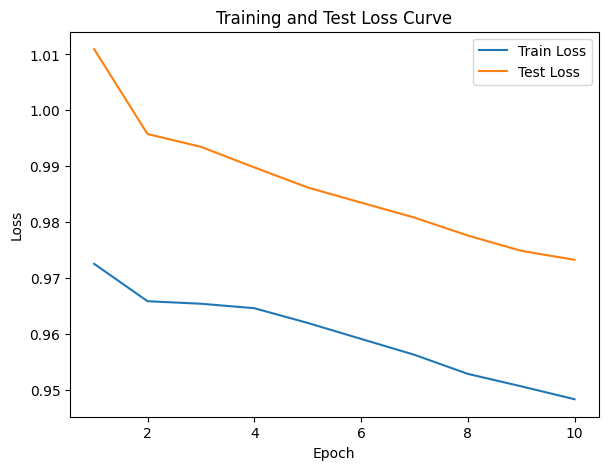

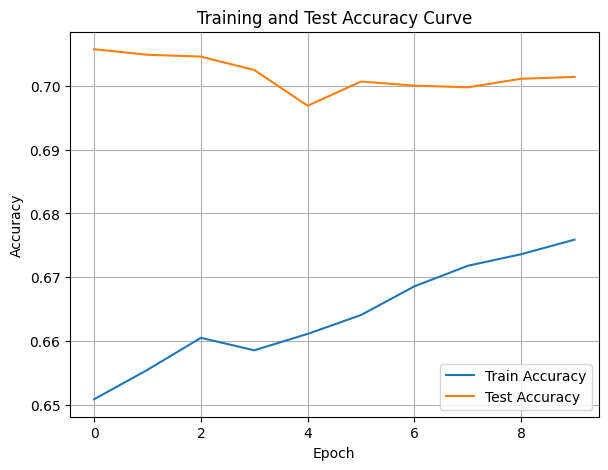

./saved_models/model_3.pth
Training Model with id 4
in multi


Training Process:  10%|█         | 1/10 [00:00<00:00,  9.32it/s]

Epoch [1/10], Train F1:0.40311845106072186, Train Loss: 1.0898, Train Acc: 0.3744, Test F1:0.30805828129646146, Test Loss: 1.1080, Test Acc: 0.2674


Training Process:  20%|██        | 2/10 [00:00<00:00,  9.68it/s]

Epoch [2/10], Train F1:0.39247132660969186, Train Loss: 1.0979, Train Acc: 0.3676, Test F1:0.26083473523992634, Test Loss: 1.1104, Test Acc: 0.2083


Training Process:  20%|██        | 2/10 [00:00<00:00,  9.68it/s]

Epoch [3/10], Train F1:0.38840144131285737, Train Loss: 1.0974, Train Acc: 0.3685, Test F1:0.23980332998100345, Test Loss: 1.1119, Test Acc: 0.1834


Training Process:  40%|████      | 4/10 [00:00<00:00, 10.49it/s]

Epoch [4/10], Train F1:0.39397604197504377, Train Loss: 1.0927, Train Acc: 0.3815, Test F1:0.22328548644338117, Test Loss: 1.1136, Test Acc: 0.1656
Epoch [5/10], Train F1:0.39287720384120073, Train Loss: 1.0899, Train Acc: 0.3853, Test F1:0.23581414473684212, Test Loss: 1.1118, Test Acc: 0.1757


Training Process:  60%|██████    | 6/10 [00:00<00:00, 11.04it/s]

Epoch [6/10], Train F1:0.4044719455949084, Train Loss: 1.0848, Train Acc: 0.3976, Test F1:0.23546611627106984, Test Loss: 1.1111, Test Acc: 0.1749


Training Process:  60%|██████    | 6/10 [00:00<00:00, 11.04it/s]

Epoch [7/10], Train F1:0.4053618716568256, Train Loss: 1.0829, Train Acc: 0.3987, Test F1:0.25929633867276886, Test Loss: 1.1087, Test Acc: 0.1970


Training Process:  80%|████████  | 8/10 [00:00<00:00, 10.85it/s]

Epoch [8/10], Train F1:0.41447356564674814, Train Loss: 1.0786, Train Acc: 0.4077, Test F1:0.26397146254458975, Test Loss: 1.1075, Test Acc: 0.1989


Training Process:  80%|████████  | 8/10 [00:00<00:00, 10.85it/s]

Epoch [9/10], Train F1:0.417416211523371, Train Loss: 1.0762, Train Acc: 0.4117, Test F1:0.26594658887254785, Test Loss: 1.1065, Test Acc: 0.1999


Training Process: 100%|██████████| 10/10 [00:00<00:00, 10.69it/s]


Epoch [10/10], Train F1:0.4191241790863779, Train Loss: 1.0736, Train Acc: 0.4151, Test F1:0.2731476214746918, Test Loss: 1.1053, Test Acc: 0.2069
Total Epochs: 10
Train loss start: 1.1072806119918823, Train loss end: 1.038519024848938
Highest Mean Train Accuracy (over epoch): 0.4150595238095238
Test loss start: 1.1069542169570923, Test loss end: 1.0782147645950317
Highest mean Test Accuracy (over epoch): 0.2673611111111111


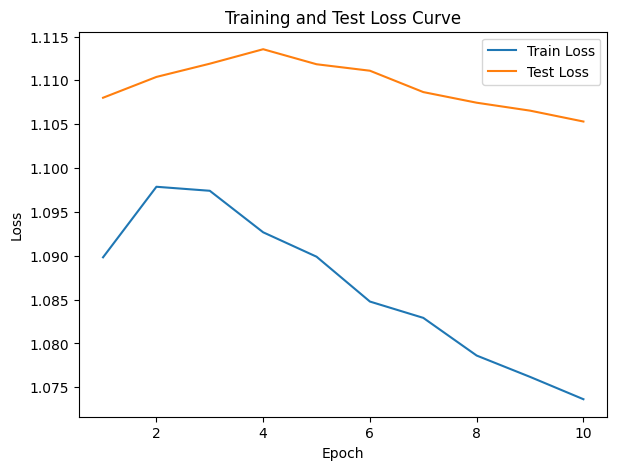

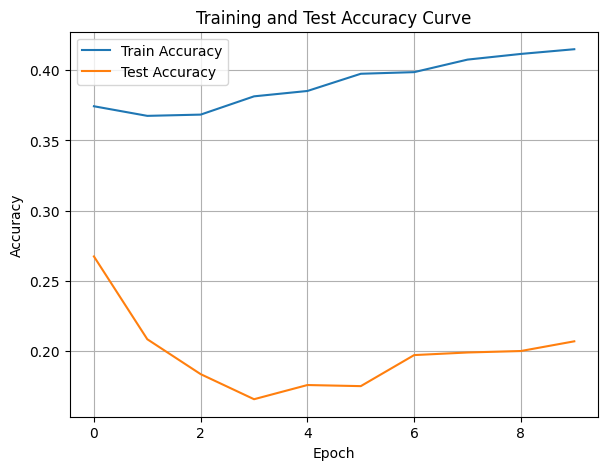

./saved_models/model_4.pth
Training Model with id 7
in multi


Training Process:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Train F1:0.4920052456680456, Train Loss: 1.0456, Train Acc: 0.5048, Test F1:0.415438596491228, Test Loss: 1.0870, Test Acc: 0.3672


Training Process:  20%|██        | 2/10 [00:00<00:00, 10.67it/s]

Epoch [2/10], Train F1:0.4794337906792208, Train Loss: 1.0388, Train Acc: 0.4960, Test F1:0.415438596491228, Test Loss: 1.0843, Test Acc: 0.3702


Training Process:  20%|██        | 2/10 [00:00<00:00, 10.67it/s]

Epoch [3/10], Train F1:0.48064499823036544, Train Loss: 1.0369, Train Acc: 0.4894, Test F1:0.39999999999999997, Test Loss: 1.0828, Test Acc: 0.3556


Training Process:  40%|████      | 4/10 [00:00<00:00, 10.28it/s]

Epoch [4/10], Train F1:0.4912122290962277, Train Loss: 1.0328, Train Acc: 0.4978, Test F1:0.404885453069293, Test Loss: 1.0829, Test Acc: 0.3605
Epoch [5/10], Train F1:0.49446012194220423, Train Loss: 1.0290, Train Acc: 0.5046, Test F1:0.42598684210526316, Test Loss: 1.0821, Test Acc: 0.3877


Training Process:  60%|██████    | 6/10 [00:00<00:00, 11.14it/s]

Epoch [6/10], Train F1:0.4938814824607031, Train Loss: 1.0249, Train Acc: 0.5110, Test F1:0.44205915136861873, Test Loss: 1.0809, Test Acc: 0.4061


Training Process:  80%|████████  | 8/10 [00:00<00:00, 11.78it/s]

Epoch [7/10], Train F1:0.4970844820597998, Train Loss: 1.0229, Train Acc: 0.5156, Test F1:0.4507703810891357, Test Loss: 1.0795, Test Acc: 0.4157
Epoch [8/10], Train F1:0.5019653635121004, Train Loss: 1.0207, Train Acc: 0.5202, Test F1:0.46568037297165416, Test Loss: 1.0778, Test Acc: 0.4328


Training Process:  80%|████████  | 8/10 [00:00<00:00, 11.78it/s]

Epoch [9/10], Train F1:0.5028220136313257, Train Loss: 1.0181, Train Acc: 0.5219, Test F1:0.47724278331021863, Test Loss: 1.0766, Test Acc: 0.4470


Training Process: 100%|██████████| 10/10 [00:00<00:00, 11.53it/s]


Epoch [10/10], Train F1:0.5066995219683086, Train Loss: 1.0161, Train Acc: 0.5278, Test F1:0.48593985355792557, Test Loss: 1.0753, Test Acc: 0.4584
Total Epochs: 10
Train loss start: 1.0584638118743896, Train loss end: 0.9696068167686462
Highest Mean Train Accuracy (over epoch): 0.5278273809523809
Test loss start: 1.0866237878799438, Test loss end: 1.046447515487671
Highest mean Test Accuracy (over epoch): 0.45842013888888883


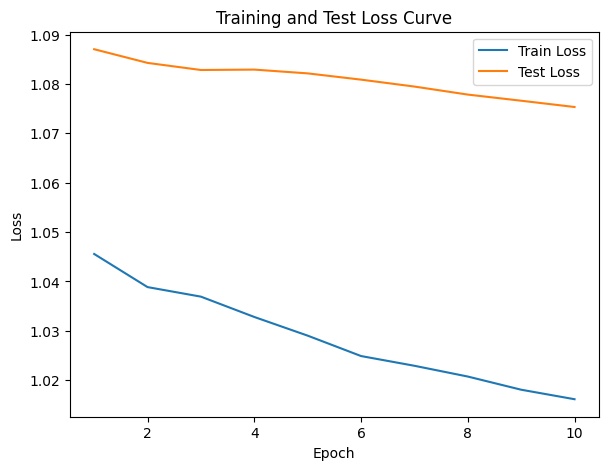

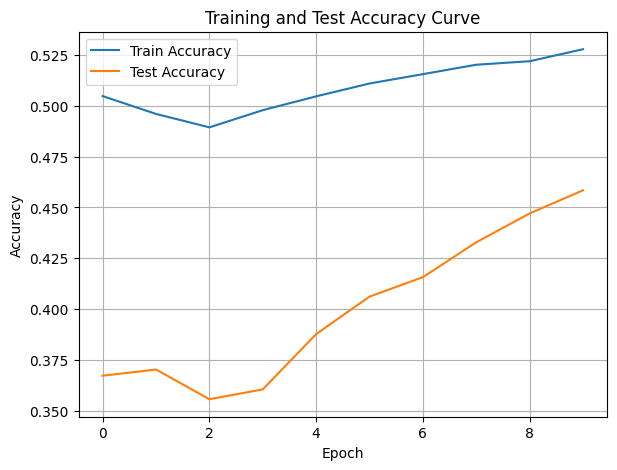

./saved_models/model_7.pth
Training Model with id 8
in multi


Training Process:  20%|██        | 2/10 [00:00<00:00, 12.65it/s]

Epoch [1/10], Train F1:0.5686047638428591, Train Loss: 0.9798, Train Acc: 0.5952, Test F1:0.5890203978846639, Test Loss: 1.0602, Test Acc: 0.5764
Epoch [2/10], Train F1:0.5658458825125492, Train Loss: 0.9833, Train Acc: 0.5874, Test F1:0.6309337784407036, Test Loss: 1.0541, Test Acc: 0.6224


Training Process:  20%|██        | 2/10 [00:00<00:00, 12.65it/s]

Epoch [3/10], Train F1:0.5652877328211832, Train Loss: 0.9827, Train Acc: 0.5893, Test F1:0.6453999338146306, Test Loss: 1.0513, Test Acc: 0.6377


Training Process:  40%|████      | 4/10 [00:00<00:00, 11.64it/s]

Epoch [4/10], Train F1:0.5661215951209299, Train Loss: 0.9773, Train Acc: 0.5937, Test F1:0.6619195743495856, Test Loss: 1.0496, Test Acc: 0.6532
Epoch [5/10], Train F1:0.567721177077314, Train Loss: 0.9755, Train Acc: 0.5957, Test F1:0.6642812118324362, Test Loss: 1.0484, Test Acc: 0.6606


Training Process:  60%|██████    | 6/10 [00:00<00:00, 12.08it/s]

Epoch [6/10], Train F1:0.5724115193480368, Train Loss: 0.9718, Train Acc: 0.6056, Test F1:0.676189185163615, Test Loss: 1.0469, Test Acc: 0.6707


Training Process:  80%|████████  | 8/10 [00:00<00:00, 12.20it/s]

Epoch [7/10], Train F1:0.5779337976281005, Train Loss: 0.9681, Train Acc: 0.6117, Test F1:0.6862553338957639, Test Loss: 1.0448, Test Acc: 0.6802
Epoch [8/10], Train F1:0.5787551691798033, Train Loss: 0.9658, Train Acc: 0.6145, Test F1:0.6923768354288882, Test Loss: 1.0430, Test Acc: 0.6863


Training Process:  80%|████████  | 8/10 [00:00<00:00, 12.20it/s]

Epoch [9/10], Train F1:0.5782709348351398, Train Loss: 0.9631, Train Acc: 0.6183, Test F1:0.7013375507251707, Test Loss: 1.0413, Test Acc: 0.6930


Training Process: 100%|██████████| 10/10 [00:00<00:00, 12.05it/s]


Epoch [10/10], Train F1:0.5830588689424165, Train Loss: 0.9606, Train Acc: 0.6209, Test F1:0.7080573032835092, Test Loss: 1.0405, Test Acc: 0.6980
Total Epochs: 10
Train loss start: 0.9753644466400146, Train loss end: 0.9893441796302795
Highest Mean Train Accuracy (over epoch): 0.6208928571428571
Test loss start: 1.0606369972229004, Test loss end: 1.0150065422058105
Highest mean Test Accuracy (over epoch): 0.6980034722222223


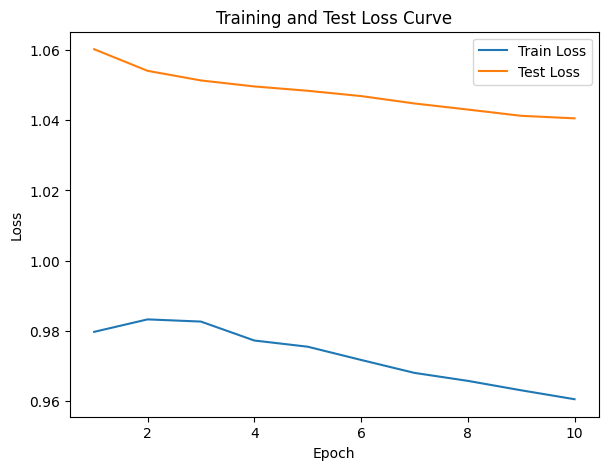

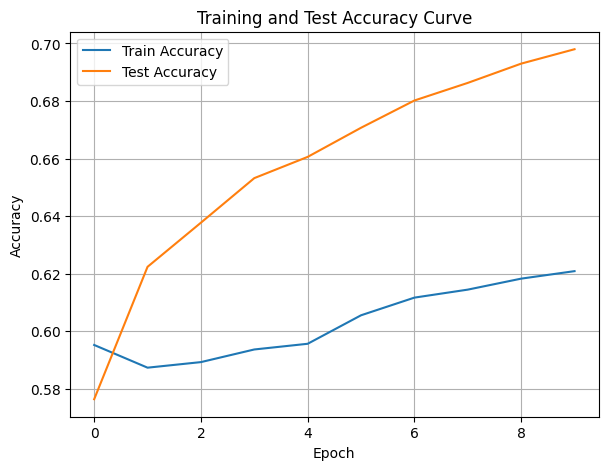

./saved_models/model_8.pth
Training Model with id 6
in multi


Training Process:  10%|█         | 1/10 [00:00<00:01,  7.19it/s]

Epoch [1/10], Train F1:0.6018767365783578, Train Loss: 0.9308, Train Acc: 0.6613, Test F1:0.7605020098806345, Test Loss: 1.0247, Test Acc: 0.7569


Training Process:  10%|█         | 1/10 [00:00<00:01,  7.19it/s]

Epoch [2/10], Train F1:0.6217318813616783, Train Loss: 0.9265, Train Acc: 0.6616, Test F1:0.7695164356708729, Test Loss: 1.0204, Test Acc: 0.7626


Training Process:  30%|███       | 3/10 [00:00<00:00,  9.74it/s]

Epoch [3/10], Train F1:0.6185156575061617, Train Loss: 0.9295, Train Acc: 0.6534, Test F1:0.7780776728145149, Test Loss: 1.0193, Test Acc: 0.7697
Epoch [4/10], Train F1:0.6165377698851209, Train Loss: 0.9244, Train Acc: 0.6585, Test F1:0.7845407114282937, Test Loss: 1.0166, Test Acc: 0.7782


Training Process:  50%|█████     | 5/10 [00:00<00:00, 10.39it/s]

Epoch [5/10], Train F1:0.6216295567676713, Train Loss: 0.9213, Train Acc: 0.6626, Test F1:0.7682315596435089, Test Loss: 1.0181, Test Acc: 0.7590


Training Process:  70%|███████   | 7/10 [00:00<00:00, 10.85it/s]

Epoch [6/10], Train F1:0.6277431664468583, Train Loss: 0.9200, Train Acc: 0.6674, Test F1:0.7721466674558101, Test Loss: 1.0175, Test Acc: 0.7629
Epoch [7/10], Train F1:0.6311618117063863, Train Loss: 0.9174, Train Acc: 0.6685, Test F1:0.7757972033731856, Test Loss: 1.0149, Test Acc: 0.7679


Training Process: 100%|██████████| 10/10 [00:00<00:00, 10.03it/s]


Epoch [8/10], Train F1:0.6365628308821241, Train Loss: 0.9152, Train Acc: 0.6720, Test F1:0.7848186959814574, Test Loss: 1.0121, Test Acc: 0.7797
Epoch [9/10], Train F1:0.6400864818977909, Train Loss: 0.9131, Train Acc: 0.6758, Test F1:0.7903207073940046, Test Loss: 1.0109, Test Acc: 0.7857
Epoch [10/10], Train F1:0.6446613013503301, Train Loss: 0.9110, Train Acc: 0.6802, Test F1:0.7922869824908955, Test Loss: 1.0101, Test Acc: 0.7887
Total Epochs: 10
Train loss start: 0.9119864702224731, Train loss end: 0.877912700176239
Highest Mean Train Accuracy (over epoch): 0.6801785714285714
Test loss start: 1.021154761314392, Test loss end: 0.9811463952064514
Highest mean Test Accuracy (over epoch): 0.7887152777777777


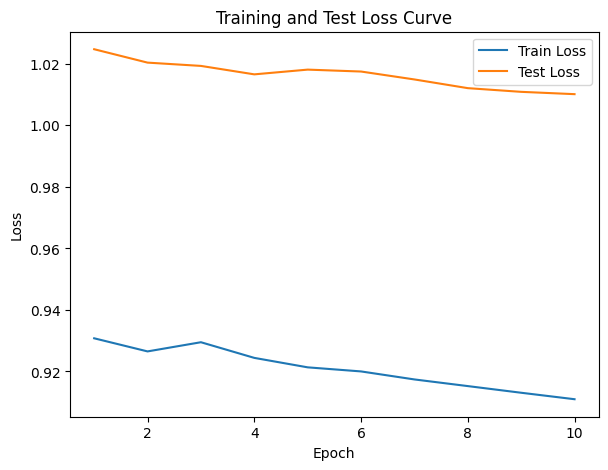

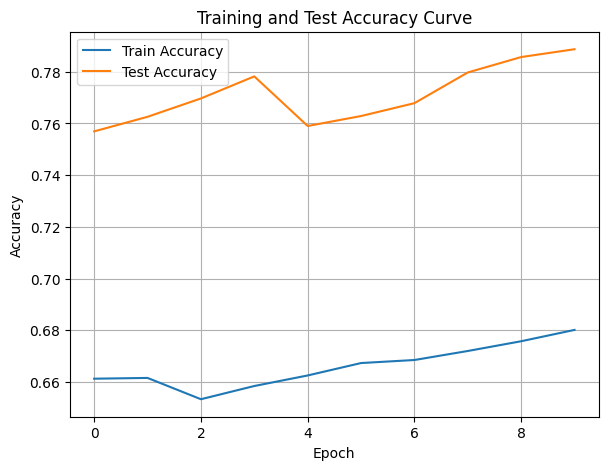

./saved_models/model_6.pth


MLP(
  (layers): ModuleList(
    (0): Linear(in_features=30, out_features=25, bias=True)
    (1): Linear(in_features=25, out_features=25, bias=True)
  )
  (batch_norms): ModuleList(
    (0-1): 2 x BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (output): Linear(in_features=25, out_features=3, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [37]:
DTEmlp4b.train_DTE()

In [38]:
DTEmlp4b.train_single_model()

Training Process:   0%|          | 0/70 [00:00<?, ?it/s]

Training Process:   1%|▏         | 1/70 [00:00<00:08,  8.28it/s]

Epoch [1/70], Train F1:0.3820813281916238, Train Loss: 1.1494, Train Acc: 0.2890, Test F1:0.5559588626739262, Test Loss: 1.0917, Test Acc: 0.4783


Training Process:   3%|▎         | 2/70 [00:00<00:08,  8.18it/s]

Epoch [2/70], Train F1:0.398281233329777, Train Loss: 1.1410, Train Acc: 0.2957, Test F1:0.5671710728708885, Test Loss: 1.0830, Test Acc: 0.4978


Training Process:   6%|▌         | 4/70 [00:00<00:06, 10.26it/s]

Epoch [3/70], Train F1:0.4163591856395629, Train Loss: 1.1367, Train Acc: 0.3090, Test F1:0.5587743080328558, Test Loss: 1.0796, Test Acc: 0.4965
Epoch [4/70], Train F1:0.41433158420565064, Train Loss: 1.1366, Train Acc: 0.3079, Test F1:0.5816282740590933, Test Loss: 1.0754, Test Acc: 0.5189


Training Process:   6%|▌         | 4/70 [00:00<00:06, 10.26it/s]

Epoch [5/70], Train F1:0.4165653843042363, Train Loss: 1.1343, Train Acc: 0.3116, Test F1:0.5985675124168367, Test Loss: 1.0723, Test Acc: 0.5366


Training Process:   9%|▊         | 6/70 [00:00<00:05, 10.97it/s]

Epoch [6/70], Train F1:0.4220538387582029, Train Loss: 1.1321, Train Acc: 0.3158, Test F1:0.5933079540565559, Test Loss: 1.0718, Test Acc: 0.5341
Epoch [7/70], Train F1:0.42806711408772885, Train Loss: 1.1300, Train Acc: 0.3213, Test F1:0.5996510429763877, Test Loss: 1.0687, Test Acc: 0.5441


Training Process:  11%|█▏        | 8/70 [00:00<00:05, 10.65it/s]

Epoch [8/70], Train F1:0.4369167618146444, Train Loss: 1.1268, Train Acc: 0.3282, Test F1:0.5978111303517616, Test Loss: 1.0678, Test Acc: 0.5450
Epoch [9/70], Train F1:0.44742411862390863, Train Loss: 1.1220, Train Acc: 0.3365, Test F1:0.6007228654499532, Test Loss: 1.0660, Test Acc: 0.5494


Training Process:  14%|█▍        | 10/70 [00:01<00:05, 10.45it/s]

Epoch [10/70], Train F1:0.45474388687417017, Train Loss: 1.1187, Train Acc: 0.3455, Test F1:0.6035804176079674, Test Loss: 1.0640, Test Acc: 0.5543
Epoch [11/70], Train F1:0.4621824916856752, Train Loss: 1.1151, Train Acc: 0.3541, Test F1:0.6147981568606834, Test Loss: 1.0614, Test Acc: 0.5679


Training Process:  19%|█▊        | 13/70 [00:01<00:06,  9.49it/s]

Epoch [12/70], Train F1:0.4686483450285176, Train Loss: 1.1112, Train Acc: 0.3609, Test F1:0.6195438134846442, Test Loss: 1.0601, Test Acc: 0.5730
Epoch [13/70], Train F1:0.47656220194412885, Train Loss: 1.1081, Train Acc: 0.3691, Test F1:0.6261741044178216, Test Loss: 1.0585, Test Acc: 0.5813


Training Process:  21%|██▏       | 15/70 [00:01<00:05,  9.58it/s]

Epoch [14/70], Train F1:0.4828975380865968, Train Loss: 1.1057, Train Acc: 0.3754, Test F1:0.6331394832286379, Test Loss: 1.0569, Test Acc: 0.5890
Epoch [15/70], Train F1:0.488439821095674, Train Loss: 1.1031, Train Acc: 0.3811, Test F1:0.6338092873174819, Test Loss: 1.0556, Test Acc: 0.5907


Training Process:  24%|██▍       | 17/70 [00:01<00:05,  9.48it/s]

Epoch [16/70], Train F1:0.49418245462553306, Train Loss: 1.0998, Train Acc: 0.3877, Test F1:0.6341887965693542, Test Loss: 1.0547, Test Acc: 0.5920
Epoch [17/70], Train F1:0.4996261319498011, Train Loss: 1.0962, Train Acc: 0.3940, Test F1:0.6406043011058551, Test Loss: 1.0534, Test Acc: 0.5995


Training Process:  27%|██▋       | 19/70 [00:01<00:05,  9.22it/s]

Epoch [18/70], Train F1:0.5069232643981124, Train Loss: 1.0929, Train Acc: 0.4004, Test F1:0.6458524702751884, Test Loss: 1.0516, Test Acc: 0.6058
Epoch [19/70], Train F1:0.5125878944353909, Train Loss: 1.0896, Train Acc: 0.4065, Test F1:0.6536598213530531, Test Loss: 1.0495, Test Acc: 0.6145


Training Process:  30%|███       | 21/70 [00:02<00:06,  8.16it/s]

Epoch [20/70], Train F1:0.5181110439469125, Train Loss: 1.0866, Train Acc: 0.4128, Test F1:0.6509179135776462, Test Loss: 1.0489, Test Acc: 0.6132
Epoch [21/70], Train F1:0.5246569022100772, Train Loss: 1.0831, Train Acc: 0.4202, Test F1:0.6529935077617849, Test Loss: 1.0478, Test Acc: 0.6164


Training Process:  33%|███▎      | 23/70 [00:02<00:05,  8.11it/s]

Epoch [22/70], Train F1:0.5301091363292837, Train Loss: 1.0802, Train Acc: 0.4261, Test F1:0.6581567208835323, Test Loss: 1.0463, Test Acc: 0.6222
Epoch [23/70], Train F1:0.5363202745021038, Train Loss: 1.0773, Train Acc: 0.4328, Test F1:0.6612887211228975, Test Loss: 1.0451, Test Acc: 0.6261


Training Process:  36%|███▌      | 25/70 [00:02<00:05,  7.92it/s]

Epoch [24/70], Train F1:0.541830606904686, Train Loss: 1.0742, Train Acc: 0.4391, Test F1:0.6604056048170227, Test Loss: 1.0442, Test Acc: 0.6264
Epoch [25/70], Train F1:0.5466632132717298, Train Loss: 1.0705, Train Acc: 0.4453, Test F1:0.6664241014681449, Test Loss: 1.0426, Test Acc: 0.6329


Training Process:  39%|███▊      | 27/70 [00:03<00:06,  6.84it/s]

Epoch [26/70], Train F1:0.5530329839280613, Train Loss: 1.0672, Train Acc: 0.4526, Test F1:0.6702349130860585, Test Loss: 1.0412, Test Acc: 0.6371
Epoch [27/70], Train F1:0.5585152785586903, Train Loss: 1.0641, Train Acc: 0.4588, Test F1:0.6750724665354905, Test Loss: 1.0396, Test Acc: 0.6424


Training Process:  41%|████▏     | 29/70 [00:03<00:06,  6.48it/s]

Epoch [28/70], Train F1:0.5634280818457674, Train Loss: 1.0611, Train Acc: 0.4646, Test F1:0.6792318874242411, Test Loss: 1.0378, Test Acc: 0.6471
Epoch [29/70], Train F1:0.5689802782415494, Train Loss: 1.0580, Train Acc: 0.4710, Test F1:0.682482089695412, Test Loss: 1.0361, Test Acc: 0.6509


Training Process:  43%|████▎     | 30/70 [00:03<00:06,  6.08it/s]

Epoch [30/70], Train F1:0.5741795315354375, Train Loss: 1.0549, Train Acc: 0.4764, Test F1:0.6863761613472764, Test Loss: 1.0342, Test Acc: 0.6550


Training Process:  44%|████▍     | 31/70 [00:03<00:06,  5.72it/s]

Epoch [31/70], Train F1:0.5793620537505801, Train Loss: 1.0518, Train Acc: 0.4826, Test F1:0.6901751557100223, Test Loss: 1.0324, Test Acc: 0.6591


Training Process:  46%|████▌     | 32/70 [00:03<00:07,  5.39it/s]

Epoch [32/70], Train F1:0.585166465411719, Train Loss: 1.0485, Train Acc: 0.4892, Test F1:0.6945692342771617, Test Loss: 1.0308, Test Acc: 0.6638


Training Process:  49%|████▊     | 34/70 [00:04<00:06,  5.29it/s]

Epoch [33/70], Train F1:0.5891982531123336, Train Loss: 1.0454, Train Acc: 0.4948, Test F1:0.6976250450888071, Test Loss: 1.0296, Test Acc: 0.6674
Epoch [34/70], Train F1:0.5948202318251009, Train Loss: 1.0423, Train Acc: 0.5014, Test F1:0.699981157594263, Test Loss: 1.0284, Test Acc: 0.6701


Training Process:  51%|█████▏    | 36/70 [00:04<00:05,  5.67it/s]

Epoch [35/70], Train F1:0.5985995864185093, Train Loss: 1.0397, Train Acc: 0.5056, Test F1:0.7034484778039231, Test Loss: 1.0270, Test Acc: 0.6739
Epoch [36/70], Train F1:0.603902669246593, Train Loss: 1.0365, Train Acc: 0.5114, Test F1:0.7055132681693671, Test Loss: 1.0257, Test Acc: 0.6762


Training Process:  53%|█████▎    | 37/70 [00:04<00:05,  6.10it/s]

Epoch [37/70], Train F1:0.6085816861601573, Train Loss: 1.0332, Train Acc: 0.5172, Test F1:0.707456043477917, Test Loss: 1.0244, Test Acc: 0.6785


Training Process:  56%|█████▌    | 39/70 [00:05<00:05,  6.20it/s]

Epoch [38/70], Train F1:0.613421069400576, Train Loss: 1.0300, Train Acc: 0.5233, Test F1:0.70951543610901, Test Loss: 1.0232, Test Acc: 0.6808
Epoch [39/70], Train F1:0.6176595827579227, Train Loss: 1.0270, Train Acc: 0.5284, Test F1:0.7110282751968487, Test Loss: 1.0220, Test Acc: 0.6826


Training Process:  59%|█████▊    | 41/70 [00:05<00:04,  6.46it/s]

Epoch [40/70], Train F1:0.6216841556913176, Train Loss: 1.0239, Train Acc: 0.5337, Test F1:0.7124082845607199, Test Loss: 1.0206, Test Acc: 0.6843
Epoch [41/70], Train F1:0.626050459687894, Train Loss: 1.0208, Train Acc: 0.5389, Test F1:0.7141983952179833, Test Loss: 1.0193, Test Acc: 0.6863


Training Process:  61%|██████▏   | 43/70 [00:05<00:04,  6.70it/s]

Epoch [42/70], Train F1:0.6304085493789275, Train Loss: 1.0179, Train Acc: 0.5444, Test F1:0.716866130975972, Test Loss: 1.0178, Test Acc: 0.6893
Epoch [43/70], Train F1:0.6339326287446805, Train Loss: 1.0153, Train Acc: 0.5488, Test F1:0.7194048391290411, Test Loss: 1.0163, Test Acc: 0.6921


Training Process:  64%|██████▍   | 45/70 [00:06<00:03,  6.54it/s]

Epoch [44/70], Train F1:0.6379498720138796, Train Loss: 1.0123, Train Acc: 0.5538, Test F1:0.7217732985490076, Test Loss: 1.0148, Test Acc: 0.6948
Epoch [45/70], Train F1:0.6415463063752637, Train Loss: 1.0096, Train Acc: 0.5585, Test F1:0.7231384749321311, Test Loss: 1.0137, Test Acc: 0.6964


Training Process:  67%|██████▋   | 47/70 [00:06<00:03,  6.48it/s]

Epoch [46/70], Train F1:0.6453571465402532, Train Loss: 1.0069, Train Acc: 0.5628, Test F1:0.7219795524858597, Test Loss: 1.0129, Test Acc: 0.6959
Epoch [47/70], Train F1:0.6488977542213192, Train Loss: 1.0041, Train Acc: 0.5673, Test F1:0.7230488384913563, Test Loss: 1.0118, Test Acc: 0.6972


Training Process:  70%|███████   | 49/70 [00:06<00:03,  5.92it/s]

Epoch [48/70], Train F1:0.6514579568283354, Train Loss: 1.0019, Train Acc: 0.5706, Test F1:0.7244260335245108, Test Loss: 1.0106, Test Acc: 0.6988
Epoch [49/70], Train F1:0.6548696996212936, Train Loss: 0.9992, Train Acc: 0.5749, Test F1:0.7259148409624919, Test Loss: 1.0093, Test Acc: 0.7005


Training Process:  73%|███████▎  | 51/70 [00:07<00:03,  5.99it/s]

Epoch [50/70], Train F1:0.6580954146966441, Train Loss: 0.9966, Train Acc: 0.5791, Test F1:0.7288211814131357, Test Loss: 1.0077, Test Acc: 0.7037
Epoch [51/70], Train F1:0.6615470938361588, Train Loss: 0.9938, Train Acc: 0.5834, Test F1:0.7304982935099751, Test Loss: 1.0063, Test Acc: 0.7056


Training Process:  74%|███████▍  | 52/70 [00:07<00:03,  5.91it/s]

Epoch [52/70], Train F1:0.665055409250821, Train Loss: 0.9912, Train Acc: 0.5877, Test F1:0.7322745919807359, Test Loss: 1.0049, Test Acc: 0.7077


Training Process:  77%|███████▋  | 54/70 [00:07<00:02,  5.68it/s]

Epoch [53/70], Train F1:0.6688031505245873, Train Loss: 0.9884, Train Acc: 0.5925, Test F1:0.7338111947729965, Test Loss: 1.0037, Test Acc: 0.7095
Epoch [54/70], Train F1:0.67200007513161, Train Loss: 0.9860, Train Acc: 0.5963, Test F1:0.7344593114963207, Test Loss: 1.0026, Test Acc: 0.7104


Training Process:  79%|███████▊  | 55/70 [00:07<00:02,  5.51it/s]

Epoch [55/70], Train F1:0.6754517941356917, Train Loss: 0.9835, Train Acc: 0.6006, Test F1:0.73554425683017, Test Loss: 1.0012, Test Acc: 0.7117


Training Process:  80%|████████  | 56/70 [00:08<00:02,  5.32it/s]

Epoch [56/70], Train F1:0.6790937958687105, Train Loss: 0.9809, Train Acc: 0.6052, Test F1:0.7368959770942081, Test Loss: 0.9999, Test Acc: 0.7134


Training Process:  81%|████████▏ | 57/70 [00:08<00:02,  4.92it/s]

Epoch [57/70], Train F1:0.6818133226851442, Train Loss: 0.9783, Train Acc: 0.6089, Test F1:0.7383411224326842, Test Loss: 0.9986, Test Acc: 0.7151


Training Process:  83%|████████▎ | 58/70 [00:08<00:02,  4.96it/s]

Epoch [58/70], Train F1:0.6847519364502397, Train Loss: 0.9757, Train Acc: 0.6127, Test F1:0.7394550006847371, Test Loss: 0.9974, Test Acc: 0.7164


Training Process:  84%|████████▍ | 59/70 [00:08<00:02,  4.98it/s]

Epoch [59/70], Train F1:0.68759652599256, Train Loss: 0.9733, Train Acc: 0.6163, Test F1:0.7402396773044603, Test Loss: 0.9963, Test Acc: 0.7174


Training Process:  86%|████████▌ | 60/70 [00:08<00:01,  5.02it/s]

Epoch [60/70], Train F1:0.6901212553496389, Train Loss: 0.9711, Train Acc: 0.6194, Test F1:0.7412752147008098, Test Loss: 0.9952, Test Acc: 0.7186


Training Process:  87%|████████▋ | 61/70 [00:09<00:01,  5.08it/s]

Epoch [61/70], Train F1:0.6927218918803449, Train Loss: 0.9686, Train Acc: 0.6228, Test F1:0.7429691861985743, Test Loss: 0.9937, Test Acc: 0.7206


Training Process:  90%|█████████ | 63/70 [00:09<00:01,  5.31it/s]

Epoch [62/70], Train F1:0.6955782973226932, Train Loss: 0.9662, Train Acc: 0.6265, Test F1:0.7450114203642367, Test Loss: 0.9924, Test Acc: 0.7228
Epoch [63/70], Train F1:0.6981773035821291, Train Loss: 0.9639, Train Acc: 0.6297, Test F1:0.7467058655632811, Test Loss: 0.9911, Test Acc: 0.7247


Training Process:  93%|█████████▎| 65/70 [00:09<00:00,  5.46it/s]

Epoch [64/70], Train F1:0.7004255972055559, Train Loss: 0.9616, Train Acc: 0.6325, Test F1:0.7484772288324154, Test Loss: 0.9897, Test Acc: 0.7267
Epoch [65/70], Train F1:0.7030621531725201, Train Loss: 0.9594, Train Acc: 0.6358, Test F1:0.7500772145731932, Test Loss: 0.9884, Test Acc: 0.7286


In [ ]:
DTEmlp4b.train_DTE()

In [ ]:
DTEmlp4b.train_single_model()

In [ ]:
DTEmlp4b.train_DTE()

In [ ]:
DTEmlp4b.train_single_model()

In [ ]:
DTEmlp4b.train_DTE()

In [ ]:
DTEmlp4b.train_single_model()

In [ ]:
DTEmlp4b.train_DTE()

In [ ]:
DTEmlp4b.train_single_model()

# Base 6

In [ ]:
multiLayerPerceptron = MLP(input_size=input_size, hidden_layers=hidden_layers, output_size=output_size+1, dropout=.5) #hidden size default at 100

# Fill DTE params
modelSaveDirectory = './saved_models/'
DTEmlp6b = DeepTreeEnsemble(task_name='regression',
                                model_arch=multiLayerPerceptron,
                                model_dir=modelSaveDirectory, 
                                base_number=6,
                                epochs=10,
                                train_dataloader=train_dataloader, 
                                test_dataloader=test_dataloader,
                                learning_rate=0.0001)

In [ ]:
DTEmlp6b.train_DTE()

In [ ]:
DTEmlp6b.train_single_model()

In [ ]:
DTEmlp6b.train_DTE()

In [ ]:
DTEmlp6b.train_single_model()

In [ ]:
DTEmlp6b.train_DTE()

In [ ]:
DTEmlp6b.train_single_model()

In [ ]:
DTEmlp6b.train_DTE()

In [ ]:
DTEmlp6b.train_single_model()

In [ ]:
DTEmlp6b.train_DTE()

In [ ]:
DTEmlp6b.train_single_model()

## Base 8

In [ ]:
multiLayerPerceptron = MLP(input_size=input_size, hidden_layers=hidden_layers, output_size=output_size+1, dropout=.5) #hidden size default at 100

# Fill DTE params
modelSaveDirectory = './saved_models/'
DTEmlp8b = DeepTreeEnsemble(task_name='regression',
                                model_arch=multiLayerPerceptron,
                                model_dir=modelSaveDirectory, 
                                base_number=8,
                                epochs=10,
                                train_dataloader=train_dataloader, 
                                test_dataloader=test_dataloader,
                                learning_rate=0.0001)

In [ ]:
DTEmlp8b.train_DTE()

In [ ]:
DTEmlp8b.train_single_model()

In [ ]:
DTEmlp8b.train_DTE()

In [ ]:
DTEmlp8b.train_single_model()

In [ ]:
DTEmlp8b.train_DTE()

In [ ]:
DTEmlp8b.train_single_model()

In [ ]:
DTEmlp8b.train_DTE()

In [ ]:
DTEmlp8b.train_single_model()

In [ ]:
DTEmlp8b.train_DTE()

In [ ]:
DTEmlp8b.train_single_model()

## Base 10

In [ ]:
multiLayerPerceptron = MLP(input_size=input_size, hidden_layers=hidden_layers, output_size=output_size+1, dropout=.5) #hidden size default at 100

# Fill DTE params
modelSaveDirectory = './saved_models/'
DTEmlp10b = DeepTreeEnsemble(task_name='regression',
                                model_arch=multiLayerPerceptron,
                                model_dir=modelSaveDirectory, 
                                base_number=10,
                                epochs=10,
                                train_dataloader=train_dataloader, 
                                test_dataloader=test_dataloader,
                                learning_rate=0.0001)

In [ ]:
DTEmlp10b.train_DTE()

In [ ]:
DTEmlp10b.train_single_model()

In [ ]:
DTEmlp10b.train_DTE()

In [ ]:
DTEmlp10b.train_single_model()

In [ ]:
DTEmlp10b.train_DTE()

In [ ]:
DTEmlp10b.train_single_model()

In [ ]:
DTEmlp10b.train_DTE()

In [ ]:
DTEmlp10b.train_single_model()

In [ ]:
DTEmlp10b.train_DTE()

In [ ]:
DTEmlp10b.train_single_model()

## Base 12

In [ ]:
multiLayerPerceptron = MLP(input_size=input_size, hidden_layers=hidden_layers, output_size=output_size+1, dropout=.5) #hidden size default at 100

# Fill DTE params
modelSaveDirectory = './saved_models/'
DTEmlp12b = DeepTreeEnsemble(task_name='regression',
                                model_arch=multiLayerPerceptron,
                                model_dir=modelSaveDirectory, 
                                base_number=12,
                                epochs=10,
                                train_dataloader=train_dataloader, 
                                test_dataloader=test_dataloader,
                                learning_rate=0.0001)

In [ ]:
DTEmlp12b.train_DTE()

In [ ]:
DTEmlp12b.train_single_model()

In [ ]:
DTEmlp12b.train_DTE()

In [ ]:
DTEmlp12b.train_single_model()

In [ ]:
DTEmlp12b.train_DTE()

In [ ]:
DTEmlp12b.train_single_model()

In [ ]:
DTEmlp12b.train_DTE()

In [ ]:
DTEmlp12b.train_single_model()

In [ ]:
DTEmlp12b.train_DTE()

In [ ]:
DTEmlp12b.train_single_model()